## Victoria mental illness issue and social-eco & geographic distribution

> Implementation: Xingli Wang

> Data generater: Sakshi , Zizhuo


In [1]:
import pandas as pd
import geopandas as gpd 
import matplotlib.pyplot as plt 

### Read Clinical data

In [2]:
synthetic = pd.read_csv("data/vic_anxiety.csv")
synthetic.columns

Index(['Id', 'ZIP', 'RACE', 'GENDER', 'ETHNICITY', 'INCOME',
       'HEALTHCARE_EXPENSES', 'HEALTHCARE_COVERAGE', 'CONDITION',
       'OBSERVED_CONDITION', 'VALUE', 'Suburb'],
      dtype='object')

In [3]:
synthetic.shape

(14334, 12)

### Synthetic dataset overview

In [4]:
synthetic.head()

,Id,ZIP,RACE,GENDER,ETHNICITY,INCOME,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,CONDITION,OBSERVED_CONDITION,VALUE,Suburb
0,16c73553-9400-1f2c-bcf9-7b5ef75150d2,3000,white,F,hispanic,45504,286834.48,130435.94,Severe anxiety (panic) (finding),Generalized anxiety disorder 7 item (GAD-7) to...,3.0,Melbourne
1,16c73553-9400-1f2c-bcf9-7b5ef75150d2,3000,white,F,hispanic,45504,286834.48,130435.94,Severe anxiety (panic) (finding),Generalized anxiety disorder 7 item (GAD-7) to...,3.0,Melbourne
2,16c73553-9400-1f2c-bcf9-7b5ef75150d2,3000,white,F,hispanic,45504,286834.48,130435.94,Severe anxiety (panic) (finding),Generalized anxiety disorder 7 item (GAD-7) to...,21.0,Melbourne
3,16c73553-9400-1f2c-bcf9-7b5ef75150d2,3000,white,F,hispanic,45504,286834.48,130435.94,Severe anxiety (panic) (finding),Generalized anxiety disorder 7 item (GAD-7) to...,2.0,Melbourne
4,16c73553-9400-1f2c-bcf9-7b5ef75150d2,3000,white,F,hispanic,45504,286834.48,130435.94,Severe anxiety (panic) (finding),Generalized anxiety disorder 7 item (GAD-7) to...,3.0,Melbourne


In [5]:
synthetic.Suburb.unique()

array(['Melbourne', 'Yarra', 'Port Phillip', 'Maribyrnong', 'Hobsons Bay',
       'Brimbank', 'Wyndham', 'Moonee Valley', 'Moreland', 'Hume',
       'Darebin', 'Banyule', 'Nillumbik', 'Manningham', 'Boroondara',
       'Whitehorse', 'Maroondah', 'Yarra Ranges', 'Stonnington', 'Monash',
       'Knox', 'Glen Eira', 'Greater Dandenong', 'Frankston',
       'Greater Geelong', 'Queenscliffe', 'Surf Coast', 'Colac Otway',
       'Corangamite', 'Warrnambool', 'Moyne', 'Glenelg', 'Ararat',
       'Southern Grampians', 'West Wimmera', 'Golden Plains', 'Moorabool',
       'Melton', 'Ballarat', 'Hepburn', 'Central Goldfields', 'Pyrenees',
       'Northern Grampians', 'Horsham', 'Yarriambiack', 'Hindmarsh',
       'Macedon Ranges', 'Mount Alexander', 'Buloke', 'Swan Hill',
       'Mildura', 'Greater Bendigo', 'Loddon', 'Mitchell', 'Gannawarra',
       'Campaspe', 'Strathbogie', 'Greater Shepparton', 'Moira'],
      dtype=object)

In [6]:
synthetic.groupby('ETHNICITY').size() 

ETHNICITY
hispanic       5877
nonhispanic    8457
dtype: int64

In [7]:
synthetic.groupby('OBSERVED_CONDITION').size()

OBSERVED_CONDITION
Generalized anxiety disorder 7 item (GAD-7) total score [Reported.PHQ]    14334
dtype: int64

In [8]:
synthetic.groupby('GENDER').size()

GENDER
F    8104
M    6230
dtype: int64

In [9]:
# Descriptive Statistics for numeric columns
# synthetic.describe()

#### Check Null value

In [10]:
synthetic.isnull().sum()

Id                     0
ZIP                    0
RACE                   0
GENDER                 0
ETHNICITY              0
INCOME                 0
HEALTHCARE_EXPENSES    0
HEALTHCARE_COVERAGE    0
CONDITION              0
OBSERVED_CONDITION     0
VALUE                  0
Suburb                 0
dtype: int64

There is no missing value, hence we can start plotting.

### Read social-economic data

In [11]:
seifa = pd.read_csv("data/socialeco_data.csv")
seifa.columns

Index(['2016 Postal Area (POA) Code',
       'Relative Socio-economic Disadvantage Score',
       'Relative Socio-economic Disadvantage Decile',
       'Index of Relative Socio-economic Advantage and Disadvantage Score',
       'Index of Relative Socio-economic Advantage and Disadvantage Decile',
       'Index of Economic Resources Score',
       'Index of Economic Resources Decile',
       'Index of Education and Occupation Score',
       'Index of Education and Occupation Decile',
       'Usual Resident Population'],
      dtype='object')

In [12]:
seifa.shape

(2632, 10)

#### Drop the None value rows

In [13]:
seifa.isna().sum()

2016 Postal Area (POA) Code                                           1
Relative Socio-economic Disadvantage Score                            2
Relative Socio-economic Disadvantage Decile                           2
Index of Relative Socio-economic Advantage and Disadvantage Score     2
Index of Relative Socio-economic Advantage and Disadvantage Decile    2
Index of Economic Resources Score                                     2
Index of Economic Resources Decile                                    2
Index of Education and Occupation Score                               2
Index of Education and Occupation Decile                              2
Usual Resident Population                                             2
dtype: int64

In [14]:
seifa.tail()

,2016 Postal Area (POA) Code,Relative Socio-economic Disadvantage Score,Relative Socio-economic Disadvantage Decile,Index of Relative Socio-economic Advantage and Disadvantage Score,Index of Relative Socio-economic Advantage and Disadvantage Decile,Index of Economic Resources Score,Index of Economic Resources Decile,Index of Education and Occupation Score,Index of Education and Occupation Decile,Usual Resident Population
2627,7468,967,4,937,3,964,3,917.0,2.0,708
2628,7469,823,1,821,1,867,1,825.0,1.0,768
2629,7470,885,1,881,1,893,1,883.0,1.0,708
2630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2631,© Commonwealth of Australia 2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# Number of rows to drop
n = 2
 
# Dropping last n rows using drop
seifa.drop(seifa.tail(n).index, inplace = True)
print(seifa.head(), '\n', seifa.shape)

  2016 Postal Area (POA) Code Relative Socio-economic Disadvantage Score  \
0                         800                                       1066   
1                         810                                       1037   
2                         812                                       1013   
3                         815                                       1075   
4                         820                                       1073   

  Relative Socio-economic Disadvantage Decile  \
0                                           9   
1                                           8   
2                                           6   
3                                           9   
4                                           9   

  Index of Relative Socio-economic Advantage and Disadvantage Score  \
0                                               1096                  
1                                               1052                  
2                                  

### Filter Victoria SEIFA data using zip code in synthetic datasets

In [16]:
a = synthetic['ZIP'].unique().astype(str)
vic_seifa = seifa[seifa['2016 Postal Area (POA) Code'].isin(a)]

In [17]:
vic_seifa.shape

(443, 10)

In [18]:
synthetic.ZIP = synthetic.ZIP.astype(str)

### Prepare to plot the Choropleth map

### Merge social economic dataset and victoria mental illness dataset on the zip column

In [19]:
synthetic['Suburb'].nunique()

59

In [20]:
synthetic['ZIP'].isin(vic_seifa['2016 Postal Area (POA) Code']).value_counts()

True     13834
False      500
Name: ZIP, dtype: int64

In [21]:
synthetic['ZIP'].nunique(), synthetic[synthetic['ZIP'].isin(vic_seifa['2016 Postal Area (POA) Code'])].ZIP.nunique()

(460, 443)

In [22]:
merged_anxiety = synthetic.merge(vic_seifa[['2016 Postal Area (POA) Code', 'Index of Relative Socio-economic Advantage and Disadvantage Decile', 'Index of Economic Resources Decile']], left_on='ZIP', right_on = '2016 Postal Area (POA) Code')

merged_anxiety.columns, merged_anxiety.shape

(Index(['Id', 'ZIP', 'RACE', 'GENDER', 'ETHNICITY', 'INCOME',
        'HEALTHCARE_EXPENSES', 'HEALTHCARE_COVERAGE', 'CONDITION',
        'OBSERVED_CONDITION', 'VALUE', 'Suburb', '2016 Postal Area (POA) Code',
        'Index of Relative Socio-economic Advantage and Disadvantage Decile',
        'Index of Economic Resources Decile'],
       dtype='object'),
 (13834, 15))

In [42]:
merged_anxiety.isnull().sum()

Id                                                                    0
ZIP                                                                   0
RACE                                                                  0
GENDER                                                                0
ETHNICITY                                                             0
INCOME                                                                0
HEALTHCARE_EXPENSES                                                   0
HEALTHCARE_COVERAGE                                                   0
CONDITION                                                             0
OBSERVED_CONDITION                                                    0
VALUE                                                                 0
Suburb                                                                0
2016 Postal Area (POA) Code                                           0
Index of Relative Socio-economic Advantage and Disadvantage Deci

In [23]:
merged_anxiety.head()

,Id,ZIP,RACE,GENDER,ETHNICITY,INCOME,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,CONDITION,OBSERVED_CONDITION,VALUE,Suburb,2016 Postal Area (POA) Code,Index of Relative Socio-economic Advantage and Disadvantage Decile,Index of Economic Resources Decile
0,16c73553-9400-1f2c-bcf9-7b5ef75150d2,3000,white,F,hispanic,45504,286834.48,130435.94,Severe anxiety (panic) (finding),Generalized anxiety disorder 7 item (GAD-7) to...,3.0,Melbourne,3000,8,1
1,16c73553-9400-1f2c-bcf9-7b5ef75150d2,3000,white,F,hispanic,45504,286834.48,130435.94,Severe anxiety (panic) (finding),Generalized anxiety disorder 7 item (GAD-7) to...,3.0,Melbourne,3000,8,1
2,16c73553-9400-1f2c-bcf9-7b5ef75150d2,3000,white,F,hispanic,45504,286834.48,130435.94,Severe anxiety (panic) (finding),Generalized anxiety disorder 7 item (GAD-7) to...,21.0,Melbourne,3000,8,1
3,16c73553-9400-1f2c-bcf9-7b5ef75150d2,3000,white,F,hispanic,45504,286834.48,130435.94,Severe anxiety (panic) (finding),Generalized anxiety disorder 7 item (GAD-7) to...,2.0,Melbourne,3000,8,1
4,16c73553-9400-1f2c-bcf9-7b5ef75150d2,3000,white,F,hispanic,45504,286834.48,130435.94,Severe anxiety (panic) (finding),Generalized anxiety disorder 7 item (GAD-7) to...,3.0,Melbourne,3000,8,1


In [24]:
# check unique number of zip code in new df
merged_anxiety['2016 Postal Area (POA) Code'].nunique(), merged_anxiety['ZIP'].nunique(), merged_anxiety['Suburb'].nunique()

(443, 443, 59)

In [25]:
merged_anxiety['Index of Relative Socio-economic Advantage and Disadvantage Decile'] = merged_anxiety['Index of Relative Socio-economic Advantage and Disadvantage Decile'].astype('int')
merged_anxiety['Index of Economic Resources Decile'] = merged_anxiety['Index of Economic Resources Decile'].astype('int')


 # Number of patient visits and severity of anxiety vary by gender, income(healthcare) and region
 
# Economic Resources and anxiety severity

In [26]:
# Ratio between healthcare coverage and healthcare expense
hc_ratio = synthetic['HEALTHCARE_COVERAGE']/synthetic['HEALTHCARE_EXPENSES']

In [27]:
print(f"There are", synthetic.Id.nunique(), "patients", "out of", synthetic.shape[0], "data.") 

There are 664 patients out of 14334 data.


### Plot Choropleth Map

In [28]:
# Import the geopandas and geoplot libraries
import geoplot as gplt

# Load the json file with county coordinates
# geoData = gpd.read_file('https://data.gov.au/geoserver/vic-suburb-locality-boundaries-psma-administrative-boundaries/wfs?request=GetFeature&typeName=ckan_af33dd8c_0534_4e18_9245_fc64440f742e&outputFormat=json')

geodata = gpd.read_file("data/GDA2020/vic_localities.shp")

<Axes: >

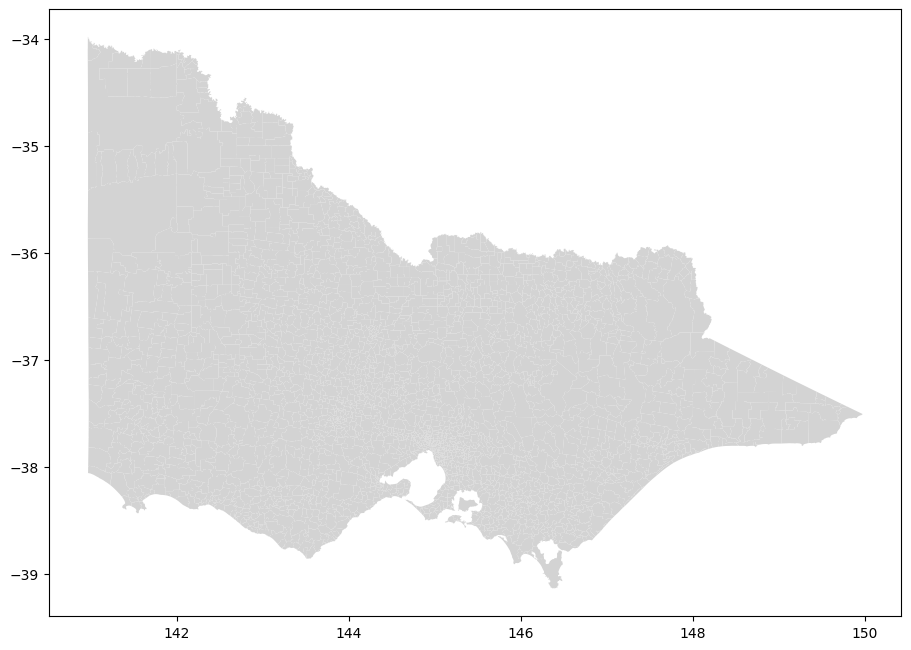

In [77]:
geodata .plot(figsize=(11,11),color="lightgrey")

In [29]:
# Check the missing values
geodata.isna().sum()

LC_PLY_PID    0
LOC_PID       0
DT_CREATE     0
LOC_NAME      0
LOC_CLASS     0
STATE         0
geometry      0
dtype: int64

In [30]:
geodata.LOC_NAME.nunique(), geodata.head()

(2957,
         LC_PLY_PID          LOC_PID   DT_CREATE    LOC_NAME  \
 0  lcp-ejVyte1DxXx  locb0dcb52a6b55  2023-06-26    Abbeyard   
 1  lcp386f2bcf9bce  locb9872f35df41  2021-06-24  Abbotsford   
 2  lcprFRP2-cPMfr5  loc8123ed12ea8d  2023-03-21  Aberfeldie   
 3  lcp9f50bd795d16  loc1eb4a229104a  2021-06-24   Aberfeldy   
 4  lcpsdH5r5m618DN  locb17be87767e1  2023-06-26     Acheron   
 
            LOC_CLASS STATE                                           geometry  
 0  Gazetted Locality   VIC  POLYGON ((146.81722 -37.09734, 146.81729 -37.0...  
 1  Gazetted Locality   VIC  POLYGON ((145.00235 -37.80722, 145.00350 -37.8...  
 2  Gazetted Locality   VIC  POLYGON ((144.89830 -37.76464, 144.89790 -37.7...  
 3  Gazetted Locality   VIC  POLYGON ((146.39448 -37.71006, 146.39405 -37.7...  
 4  Gazetted Locality   VIC  POLYGON ((145.75030 -37.24312, 145.75037 -37.2...  )

Check the number of included Victoria suburb from fullData in Geodata.

In [31]:
# Merge clinical data and geographicial data
fullData = geodata.merge(merged_anxiety, how='left', left_on=['LOC_NAME'], right_on=['Suburb'])
fullData.shape, fullData.columns

((6325, 22),
 Index(['LC_PLY_PID', 'LOC_PID', 'DT_CREATE', 'LOC_NAME', 'LOC_CLASS', 'STATE',
        'geometry', 'Id', 'ZIP', 'RACE', 'GENDER', 'ETHNICITY', 'INCOME',
        'HEALTHCARE_EXPENSES', 'HEALTHCARE_COVERAGE', 'CONDITION',
        'OBSERVED_CONDITION', 'VALUE', 'Suburb', '2016 Postal Area (POA) Code',
        'Index of Relative Socio-economic Advantage and Disadvantage Decile',
        'Index of Economic Resources Decile'],
       dtype='object'))

In [32]:
fullData['LOC_NAME'].unique()

array(['Abbeyard', 'Abbotsford', 'Aberfeldie', ..., 'Yuulong', 'Zeerust',
       'Zumsteins'], dtype=object)

In [33]:
fullData.isna().sum()

LC_PLY_PID                                                               0
LOC_PID                                                                  0
DT_CREATE                                                                0
LOC_NAME                                                                 0
LOC_CLASS                                                                0
STATE                                                                    0
geometry                                                                 0
Id                                                                    2960
ZIP                                                                   2960
RACE                                                                  2960
GENDER                                                                2960
ETHNICITY                                                             2960
INCOME                                                                2960
HEALTHCARE_EXPENSES      

In [45]:
# Drop null values
fullData_new = fullData.dropna()

In [47]:
fullData_new.shape, fullData_new.isna().sum()

((3365, 22),
 LC_PLY_PID                                                            0
 LOC_PID                                                               0
 DT_CREATE                                                             0
 LOC_NAME                                                              0
 LOC_CLASS                                                             0
 STATE                                                                 0
 geometry                                                              0
 Id                                                                    0
 ZIP                                                                   0
 RACE                                                                  0
 GENDER                                                                0
 ETHNICITY                                                             0
 INCOME                                                                0
 HEALTHCARE_EXPENSES                  

### Check if it is the correct merge method to keep all data, fullData VS non-null data, fullData_new

In [34]:
geodata['LOC_NAME'].isin(merged_anxiety['Suburb']).value_counts()

False    2960
True       13
Name: LOC_NAME, dtype: int64

In [35]:
geodata['LOC_NAME'].isin(fullData['Suburb']).value_counts()

False    2960
True       13
Name: LOC_NAME, dtype: int64

In [48]:
fullData['Suburb'].nunique(), fullData_new['Suburb'].nunique(),  geodata['LOC_NAME'].nunique()

(13, 13, 2957)

> Number of unique suburbs in Victoria is 2957, whereas, the synthetic data generated by Synthea has 13 unique suburbs in Victoria. 

In [37]:
# merged_anxiety.groupby('Id')['Suburb'].nunique()
merged_anxiety['ZIP'].nunique(), merged_anxiety['Suburb'].nunique(), fullData['Suburb'].nunique(), fullData['LOC_NAME'].nunique()

# ??if these two is not the same, wrong merge method
# assert(merged_anxiety['Suburb'].nunique()==fullData['LOC_NAME'].nunique())

(443, 59, 13, 2957)

In [38]:
fullData['2016 Postal Area (POA) Code'].nunique(), fullData['ZIP'].nunique()

(92, 92)

In [39]:
fullData.groupby('Id')['Suburb'].size()

Id
0362cc19-bcf7-8f38-6020-dfad9e278862     64
05cdcee1-5aca-5087-910a-eb3529e59fd4      3
0734d372-cdec-41c5-0424-801d1d00555b     10
07c9a963-1dc4-872a-9d0d-536b4fbf973c    165
0c3128eb-d3aa-3a97-5c53-f7817ce06943     21
                                       ... 
f3b1a046-bd76-a1f4-9406-db7740714982    100
f542b22e-5937-9e37-b605-93e98a7e1d45      5
f5be926e-4aac-fb74-6854-09d3426204c3     47
f704d8e6-520b-3e86-e0da-c68f6b1872a2     18
fffe51a2-5f76-d521-6079-bce7b606b42e      4
Name: Suburb, Length: 132, dtype: int64

## Choropleth map - Relative Socio-economic Advantage and Disadvantage Decile

In [40]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

ValueError: could not broadcast input array from shape (512,512,4) into shape (256,256,4)

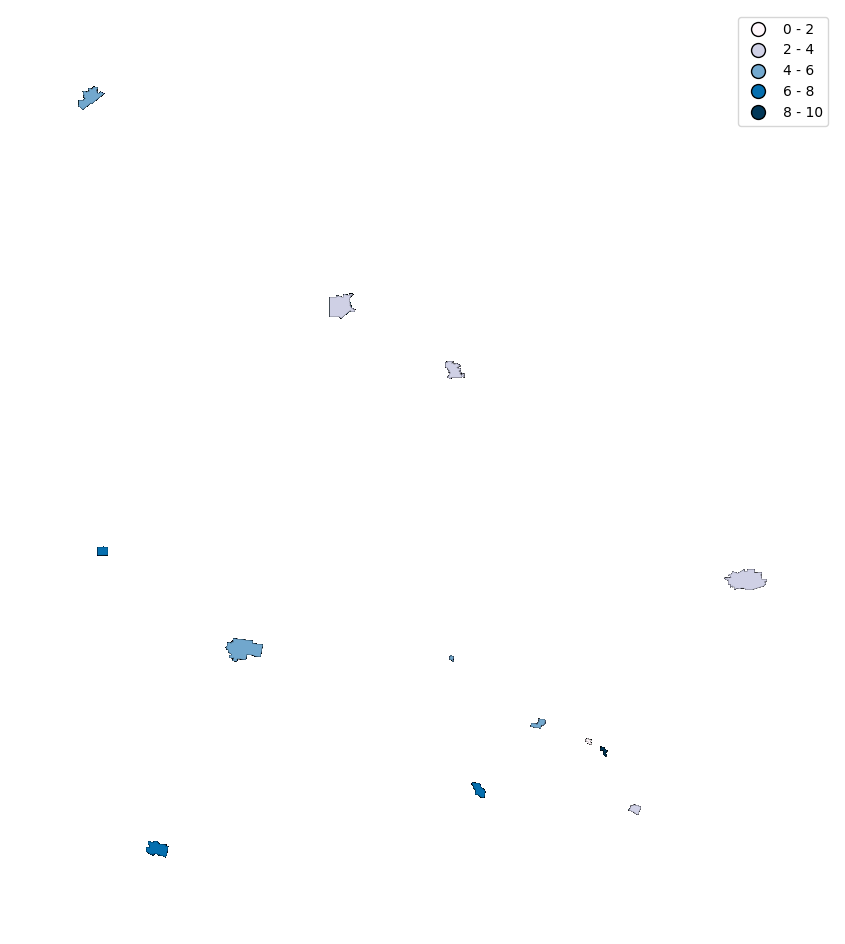

In [72]:
# Initialize the figure
import matplotlib.pyplot as plt
import mapclassify as mc
import contextily as ctx

fig, ax = plt.subplots(1, 1, figsize=(16, 12))
# scheme1 = mc.Quantiles(fullData["Index of Relative Socio-economic Advantage and Disadvantage Decile"], k=10)

# Create the first choropleth layer with a color map and legend
gplt.choropleth(fullData_new, 
    hue='Index of Relative Socio-economic Advantage and Disadvantage Decile',  #"Index of Relative Socio-economic Advantage and Disadvantage Decile", 
    linewidth=0.1,
    scheme= "FisherJenks", #scheme1, 
    cmap= 'PuBu', #yellow to green colour palette with lighter shades
    edgecolor='black',
    alpha=0.5,
    ax=ax,
    legend=True
#     legend_kwargs={'title': 'Socio-economic Advantage and Disadvantage Decile'} 
)

# scheme2 = mc.Quantiles(fullData["Index of Relative Socio-economic Advantage and Disadvantage Decile"], k=10)
# Create the second choropleth layer with a different color map and legend
# gplt.choropleth(
#     fullData,
#     hue="Index of Economic Resources Decile",
#     linewidth=0.1,
#     #scheme='Index of Economic Resources Decile', #scheme2,
#     cmap='YlOrRd',  # yellow to red colour palette
#     edgecolor='black',
#     alpha=0.5,
#     ax=ax,
#     legend=True
# #     legend_kwargs={'title': 'Economic Resources Decile'} 
# )

# cmap='inferno_r',
# Add a background map of Victoria using contextily
ctx.add_basemap(ax, crs=fullData.crs.to_string(), source=ctx.providers.Stamen.TonerLite)#, zoom = 12

# Victoria mental illness issue and social-eco & geographic distribution
ax.set_title("Social-eco factors in Victoria suburbs", fontsize=20);
# ax.legend()

# Show the plot
plt.show()

## Choropleth map - Anxiety value

In [ ]:
If you want to simplfy the data, can do below 2 chunks

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(16, 12))
# scheme1 = mc.Quantiles(fullData["Index of Relative Socio-economic Advantage and Disadvantage Decile"], k=10)

# Create the first choropleth layer with a color map and legend
gplt.choropleth(fullData_new, 
    hue='VALUE',  #"Index of Relative Socio-economic Advantage and Disadvantage Decile", 
    linewidth=0.1,
    scheme= "FisherJenks", 
    cmap= 'YlGn', #yellow to green colour palette with lighter shades
    edgecolor='black',
    alpha=0.5,
    ax=ax,
    legend=True,  # Add a legend for Variable1
    legend_kwargs={'title': 'severity of anxiety index'} 
)


# cmap='inferno_r',
# Add a background map of Victoria using contextily
ctx.add_basemap(ax, crs=fullData.crs.to_string(), source=ctx.providers.Stamen.TonerLite)

ax.set_title("Severity of anxiety in Victoria suburbs", fontsize=20);

# Show the plot
plt.show()

A easy map

KeyboardInterrupt: 

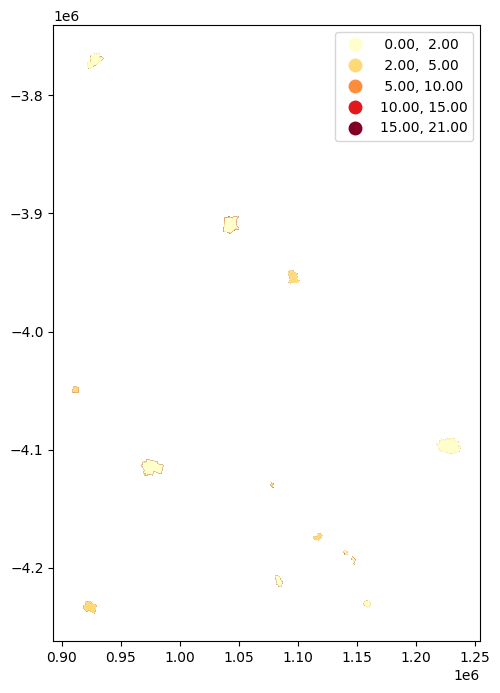

In [63]:
# Create a GeoDataFrame from your data
gdf = gpd.GeoDataFrame(fullData, geometry='geometry')

# Create a figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Plot the choropleth map
gdf = gdf.to_crs(epsg=3577)  # Project to Web Mercator (EPSG:3857)
gdf.plot(column='VALUE', cmap='YlOrRd', linewidth=0.1, scheme="FisherJenks", k=5, ax=ax, legend=True)

# Add a map background using contextily
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite, zoom=12)#zoom=12 take too long

# Set the plot title
ax.set_title("Severity of Anxiety by Region", fontsize=16)

# Show the plot
plt.show()


/Users/cindy_homefolder/anaconda3/lib/python3.11/site-packages/contextily/tile.py:528: RuntimeWarning: invalid value encountered in subtract
  lon_length = np.subtract(*lon_range)
/Users/cindy_homefolder/anaconda3/lib/python3.11/site-packages/contextily/tile.py:533: RuntimeWarning: divide by zero encountered in scalar divide
  zoom_lat = np.ceil(np.log2(360 * 2.0 / lat_length))


ValueError: cannot convert float NaN to integer

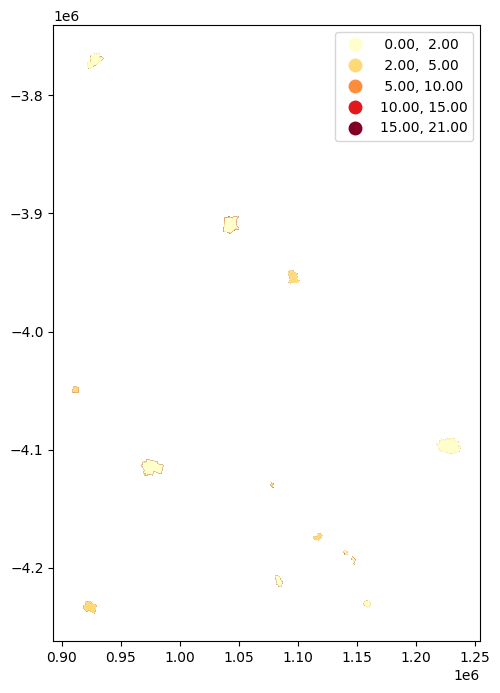

In [64]:
# Define the bounding box for Victoria (latitude and longitude limits)
# min_lon, max_lon, min_lat, max_lat = 140, 150, -40, -33  # Adjust these values as needed

# Create a GeoDataFrame from your data
gdf = gpd.GeoDataFrame(fullData, geometry='geometry')

# Create a figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Plot the choropleth map
gdf = gdf.to_crs(epsg=3577)  # Project to Australian Albers (EPSG:3577)
gdf.plot(column='VALUE', cmap='YlOrRd', linewidth=0.1, scheme="FisherJenks", k=5, ax=ax, legend=True)

# Add a map background using contextily
ctx.add_basemap(ax, crs=fullData.crs.to_string(), source=ctx.providers.Stamen.TonerLite)

# # Set the axis limits to focus on Victoria
# ax.set_xlim([min_lon, max_lon])
# ax.set_ylim([min_lat, max_lat])

# Set the plot title
ax.set_title("Severity of Anxiety by Region in Victoria, Australia", fontsize=16)

# Show the plot
plt.show()


I'm running the above code to get 2 layers of data show on the map, and I get this error. Fix the code to make it work. Check your given answer. ValueError: The plot is in continuous legend mode, implying a "matplotlib.colorbar.Colorbar" legend object. However, "legend_kwarg" contains unexpected keyword arguments not supported by this legend type. Are you sure you are not accidentally passing categorical "matplotlib.legend.Legend" legend parameters instead?